Classification of Vertebral Column Data

In [1]:
# Import libraries
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_style("whitegrid", {'axes.grid' : False})
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [2]:
import os
os.chdir('/Users/robertkelly/Documents/Uni/Masters/Semester 2/Stats and Machine Learning 2/Coursework 2/ClassificationLab')

In [3]:
# Read in the data

df = pd.read_csv('vertebral_column_data.txt', sep=" ", header=None)


# Rename columns
df = df.rename(columns={0: 'pelvic_incidence', 1: 'pelvic_tilt', 2: 'lumbar_lordosis', 
                        3: 'sacral_slope', 4: 'pelvic_radius', 5: 'spondylolisthesis',
                        6: 'category'})

# Change category column to 0 and 1
df = df.replace({'category': {'NO': 0, 'AB': 1}})

In [4]:
df.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis,sacral_slope,pelvic_radius,spondylolisthesis,category
0,63.03,22.55,39.61,40.48,98.67,-0.25,1
1,39.06,10.06,25.02,29.00,114.41,4.56,1
2,68.83,22.22,50.09,46.61,105.99,-3.53,1
3,69.30,24.65,44.31,44.64,101.87,11.21,1
4,49.71,9.65,28.32,40.06,108.17,7.92,1


In [5]:
# Unsupervised classification: K-Means Clustering

In [6]:
# Get all the features columns except the category column
df_2 = df[["pelvic_incidence", "pelvic_tilt", "lumbar_lordosis", 
           "sacral_slope", "pelvic_radius", "spondylolisthesis"]]

# define standard scaler
scaler = StandardScaler()
  
# transform data
df_2 = scaler.fit_transform(df_2)

# Make sure data is a pandas dataframe
df_2 = pd.DataFrame(df_2)

In [7]:
df_2.head()

,0,1,2,3,4,5
0,0.147227,0.501111,-0.665128,-0.184602,-1.447831,-0.707946
1,-1.245707,-0.748891,-1.452763,-1.041250,-0.264028,-0.579673
2,0.484273,0.468085,-0.099370,0.272823,-0.897295,-0.795417
3,0.511586,0.711280,-0.411401,0.125820,-1.207159,-0.402332
4,-0.626819,-0.789923,-1.274614,-0.215943,-0.733337,-0.490069


In [8]:
# Checking data is standardised. Mean = 0 and SD = 1. 
print(df_2.describe())

                  0             1             2             3             4  \
count  3.100000e+02  3.100000e+02  3.100000e+02  3.100000e+02  3.100000e+02   
mean   9.060852e-16  3.753270e-16 -5.264606e-17  1.461197e-16  1.191341e-15   
std    1.001617e+00  1.001617e+00  1.001617e+00  1.001617e+00  1.001617e+00   
min   -1.995927e+00 -2.411223e+00 -2.047673e+00 -2.207573e+00 -3.598080e+00   
25%   -8.172797e-01 -6.880918e-01 -8.060277e-01 -7.168355e-01 -5.423042e-01   
50%   -1.049776e-01 -1.183852e-01 -1.277118e-01 -4.095722e-02  2.590615e-02   
75%    7.196252e-01  4.580768e-01  5.975707e-01  7.267047e-01  5.676050e-01   
max    4.029077e+00  3.191268e+00  3.984562e+00  5.855955e+00  3.395683e+00   

                  5  
count  3.100000e+02  
mean   6.912034e-17  
std    1.001617e+00  
min   -9.962261e-01  
25%   -6.586104e-01  
50%   -3.875311e-01  
75%    3.997055e-01  
max    1.046031e+01  


In [9]:
# Putting dataframe into numpy array
array = df_2.values
xMat = np.array(array)
xDim = xMat.shape[0]
xMat[0:5,:]

array([[ 0.14722652,  0.50111133, -0.66512805, -0.18460234, -1.44783071,
        -0.70794606],
       [-1.24570706, -0.74889057, -1.45276272, -1.04124965, -0.26402779,
        -0.57967342],
       [ 0.48427345,  0.46808485, -0.0993699 ,  0.27282344, -0.89729467,
        -0.79541679],
       [ 0.51158587,  0.71127978, -0.41140063,  0.12582037, -1.20715922,
        -0.40233184],
       [-0.62681917, -0.78992346, -1.27461369, -0.2159431 , -0.73333721,
        -0.49006925]])

In [10]:
# Creating elbow plot by calculating sum-of-squares for each value of K
kMin = 1
kMax = 8
repsPerK = 10
kValues = np.zeros( kMax - kMin + 1)
sumOfSquares = np.zeros( kMax - kMin + 1)
for k in range(kMin, kMax+1):
    kValues[k - kMin] = k
    kmeansResult = KMeans( k, n_init=repsPerK ).fit( xMat )
    sumOfSquares[k - kMin] = kmeansResult.inertia_

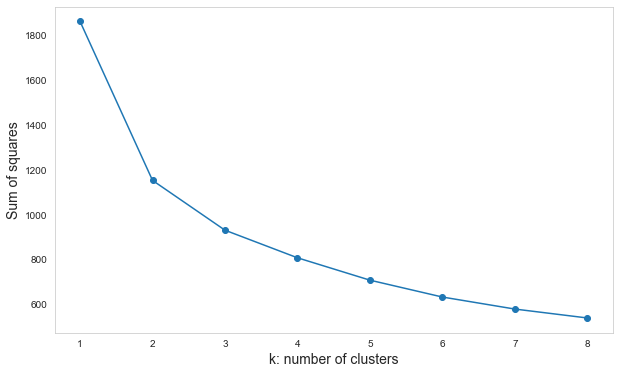

In [11]:
# Plotting elbow plot for K-Means Clustering
elbowFig = plt.figure(figsize=[10,6])
plt.plot( kValues, sumOfSquares )
plt.scatter( x=kValues, y=sumOfSquares )
plt.xlabel('k: number of clusters', fontsize=14)
plt.ylabel('Sum of squares', fontsize=14)
plt.show()

In [12]:
# K-Means Clustering with K = 2
clustering_kmeans = KMeans(n_clusters=2)

# Saving each datapoints cluster in new column
df_2['clusters'] = clustering_kmeans.fit_predict(df_2)

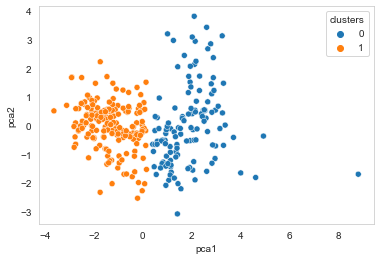

In [13]:
# Using PCA to reduce dimensions of data to allow for visualisation
pca_num_components = 2

reduced_data = PCA(n_components=pca_num_components).fit_transform(df_2)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

sns.scatterplot(x="pca1", y="pca2", hue=df_2['clusters'], data=results)
plt.show()

In [14]:
# K-Means Clustering with K = 3

clustering_kmeans = KMeans(n_clusters=3)
df_2['clusters_n3'] = clustering_kmeans.fit_predict(df_2)

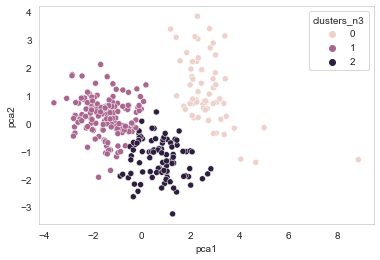

In [15]:
# Using PCA to reduce dimensions of data to allow for visualisation

pca_num_components = 2

reduced_data = PCA(n_components=pca_num_components).fit_transform(df_2)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

sns.scatterplot(x="pca1", y="pca2", hue=df_2['clusters_n3'], data=results)
plt.show()

In [16]:
# Supervised classification: K-Nearest Neighbours

In [17]:
df_3 = df_2[[0,1,2,3,4,5]]

In [18]:
display(df_3)

,0,1,2,3,4,5
0,0.147227,0.501111,-0.665128,-0.184602,-1.447831,-0.707946
1,-1.245707,-0.748891,-1.452763,-1.041250,-0.264028,-0.579673
2,0.484273,0.468085,-0.099370,0.272823,-0.897295,-0.795417
3,0.511586,0.711280,-0.411401,0.125820,-1.207159,-0.402332
4,-0.626819,-0.789923,-1.274614,-0.215943,-0.733337,-0.490069
...,...,...,...,...,...,...
305,-0.732001,-0.392605,-0.860012,-0.646505,-0.035390,-0.814618
306,-0.381007,0.317965,-1.226028,-0.726350,-0.267036,-0.712480
307,0.055410,0.515123,-0.310989,-0.313696,0.582835,-0.773549
308,-0.885997,-0.886000,-0.558778,-0.477116,0.047341,-0.695679


In [19]:
from sklearn.model_selection import train_test_split

X = df_3
y = df["category"]

# Split dataset into 70% training set and 30% test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) 

In [20]:
# For loop to find best value for K

error = []

for k in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    error.append(np.mean(y_pred != y_test))

Text(0, 0.5, 'Error Rate')

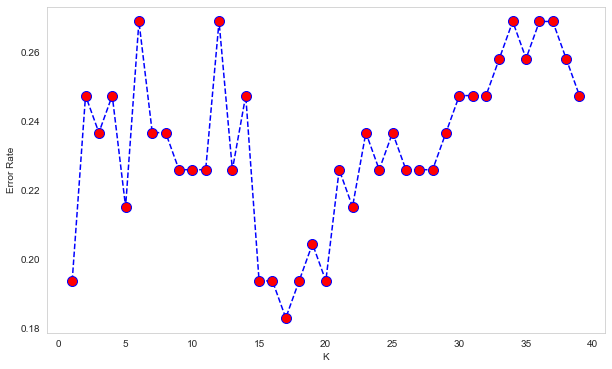

In [21]:
# Plotting the error rates for different values of K

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.xlabel('K')
plt.ylabel('Error Rate')

In [24]:
#Create KNN Classifier with K = 3
knn = KNeighborsClassifier(n_neighbors=17)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

In [25]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8172043010752689
